In [1]:
%matplotlib inline
import joblib
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
all_data0 = joblib.load("../all_data0")

In [11]:
all_data0['day_diff'] = all_data0['act_date'].values - all_data0['reg_date'].values

In [14]:
all_data0['day_diff'] = all_data0['day_diff'].dt.days

In [15]:
all_data0['reg_month'] = all_data0['reg_date'].dt.month
all_data0['reg_year'] = all_data0['reg_date'].dt.year

all_data0['act_month'] = all_data0['act_date'].dt.month
all_data0['act_year'] = all_data0['act_date'].dt.year

In [16]:
train_data = all_data0[all_data0.outcome != -1]
test_data = all_data0[all_data0.outcome == -1]

In [17]:
train_data.columns

Index(['people_id', 'activity_id', 'act_date', 'activity_category',
       'act_char_1', 'act_char_2', 'act_char_3', 'act_char_4', 'act_char_5',
       'act_char_6', 'act_char_7', 'act_char_8', 'act_char_9', 'act_char_10',
       'outcome', 'ppl_char_1', 'group_1', 'ppl_char_2', 'reg_date',
       'ppl_char_3', 'ppl_char_4', 'ppl_char_5', 'ppl_char_6', 'ppl_char_7',
       'ppl_char_8', 'ppl_char_9', 'ppl_char_10', 'ppl_char_11', 'ppl_char_12',
       'ppl_char_13', 'ppl_char_14', 'ppl_char_15', 'ppl_char_16',
       'ppl_char_17', 'ppl_char_18', 'ppl_char_19', 'ppl_char_20',
       'ppl_char_21', 'ppl_char_22', 'ppl_char_23', 'ppl_char_24',
       'ppl_char_25', 'ppl_char_26', 'ppl_char_27', 'ppl_char_28',
       'ppl_char_29', 'ppl_char_30', 'ppl_char_31', 'ppl_char_32',
       'ppl_char_33', 'ppl_char_34', 'ppl_char_35', 'ppl_char_36',
       'ppl_char_37', 'ppl_char_38', 'day_diff', 'reg_month', 'reg_year',
       'act_month', 'act_year'],
      dtype='object')

In [18]:
train_data.dtypes

people_id                    object
activity_id                  object
act_date             datetime64[ns]
activity_category            object
act_char_1                   object
act_char_2                   object
act_char_3                   object
act_char_4                   object
act_char_5                   object
act_char_6                   object
act_char_7                   object
act_char_8                   object
act_char_9                   object
act_char_10                  object
outcome                       int64
ppl_char_1                   object
group_1                      object
ppl_char_2                   object
reg_date             datetime64[ns]
ppl_char_3                   object
ppl_char_4                   object
ppl_char_5                   object
ppl_char_6                   object
ppl_char_7                   object
ppl_char_8                   object
ppl_char_9                   object
ppl_char_10                    bool
ppl_char_11                 

In [159]:
# def mean_response(factor):
#     missing_pc = train_data[factor].isnull().values.ravel().sum() / len(train_data[factor])
#     card = len(train_data[factor].unique())
#     text = "missing value: %.2f\ncardinality: %d" % (missing_pc, card)
#     mean_max = train_data.groupby([factor])['outcome'].apply(np.mean).max()

    
#     fig, ax1 = plt.subplots()
#     ax1 = train_data[factor].value_counts().plot(kind='bar', color='dodgerblue', alpha = 0.8, width=0.6, title = factor)
#     ax2 = ax1.twinx()
#     ax2 = train_data.groupby([factor])['outcome'].apply(np.mean).plot(ax = ax2, color='r', style = "--",linewidth = 1,grid = False)
#     ax2.set_xlim((-0.5,card -0.5))
    
    
#     ax2.text(1.5, mean_max-0.02, text, horizontalalignment='left',verticalalignment='top', color='black', fontsize=11,
#          bbox={'facecolor':'white', 'alpha':0.3, 'pad':2})


In [89]:
cate_var = ["ppl_char_"+ str(i) for i in range(1,10)] + ["ppl_char_38", 'people_id', 'activity_id'] +["activity_category"] + ['act_char_'+str(i) for i in range(1,11)]

In [90]:
train_data[cate_var].apply(lambda x: len(x.unique()))

ppl_char_1                 2
ppl_char_2                 3
ppl_char_3                43
ppl_char_4                25
ppl_char_5                 9
ppl_char_6                 7
ppl_char_7                25
ppl_char_8                 8
ppl_char_9                 9
ppl_char_38              101
people_id             151295
activity_id          2197291
activity_category          7
act_char_1                52
act_char_2                33
act_char_3                12
act_char_4                 8
act_char_5                 8
act_char_6                 6
act_char_7                 9
act_char_8                19
act_char_9                20
act_char_10             6516
dtype: int64

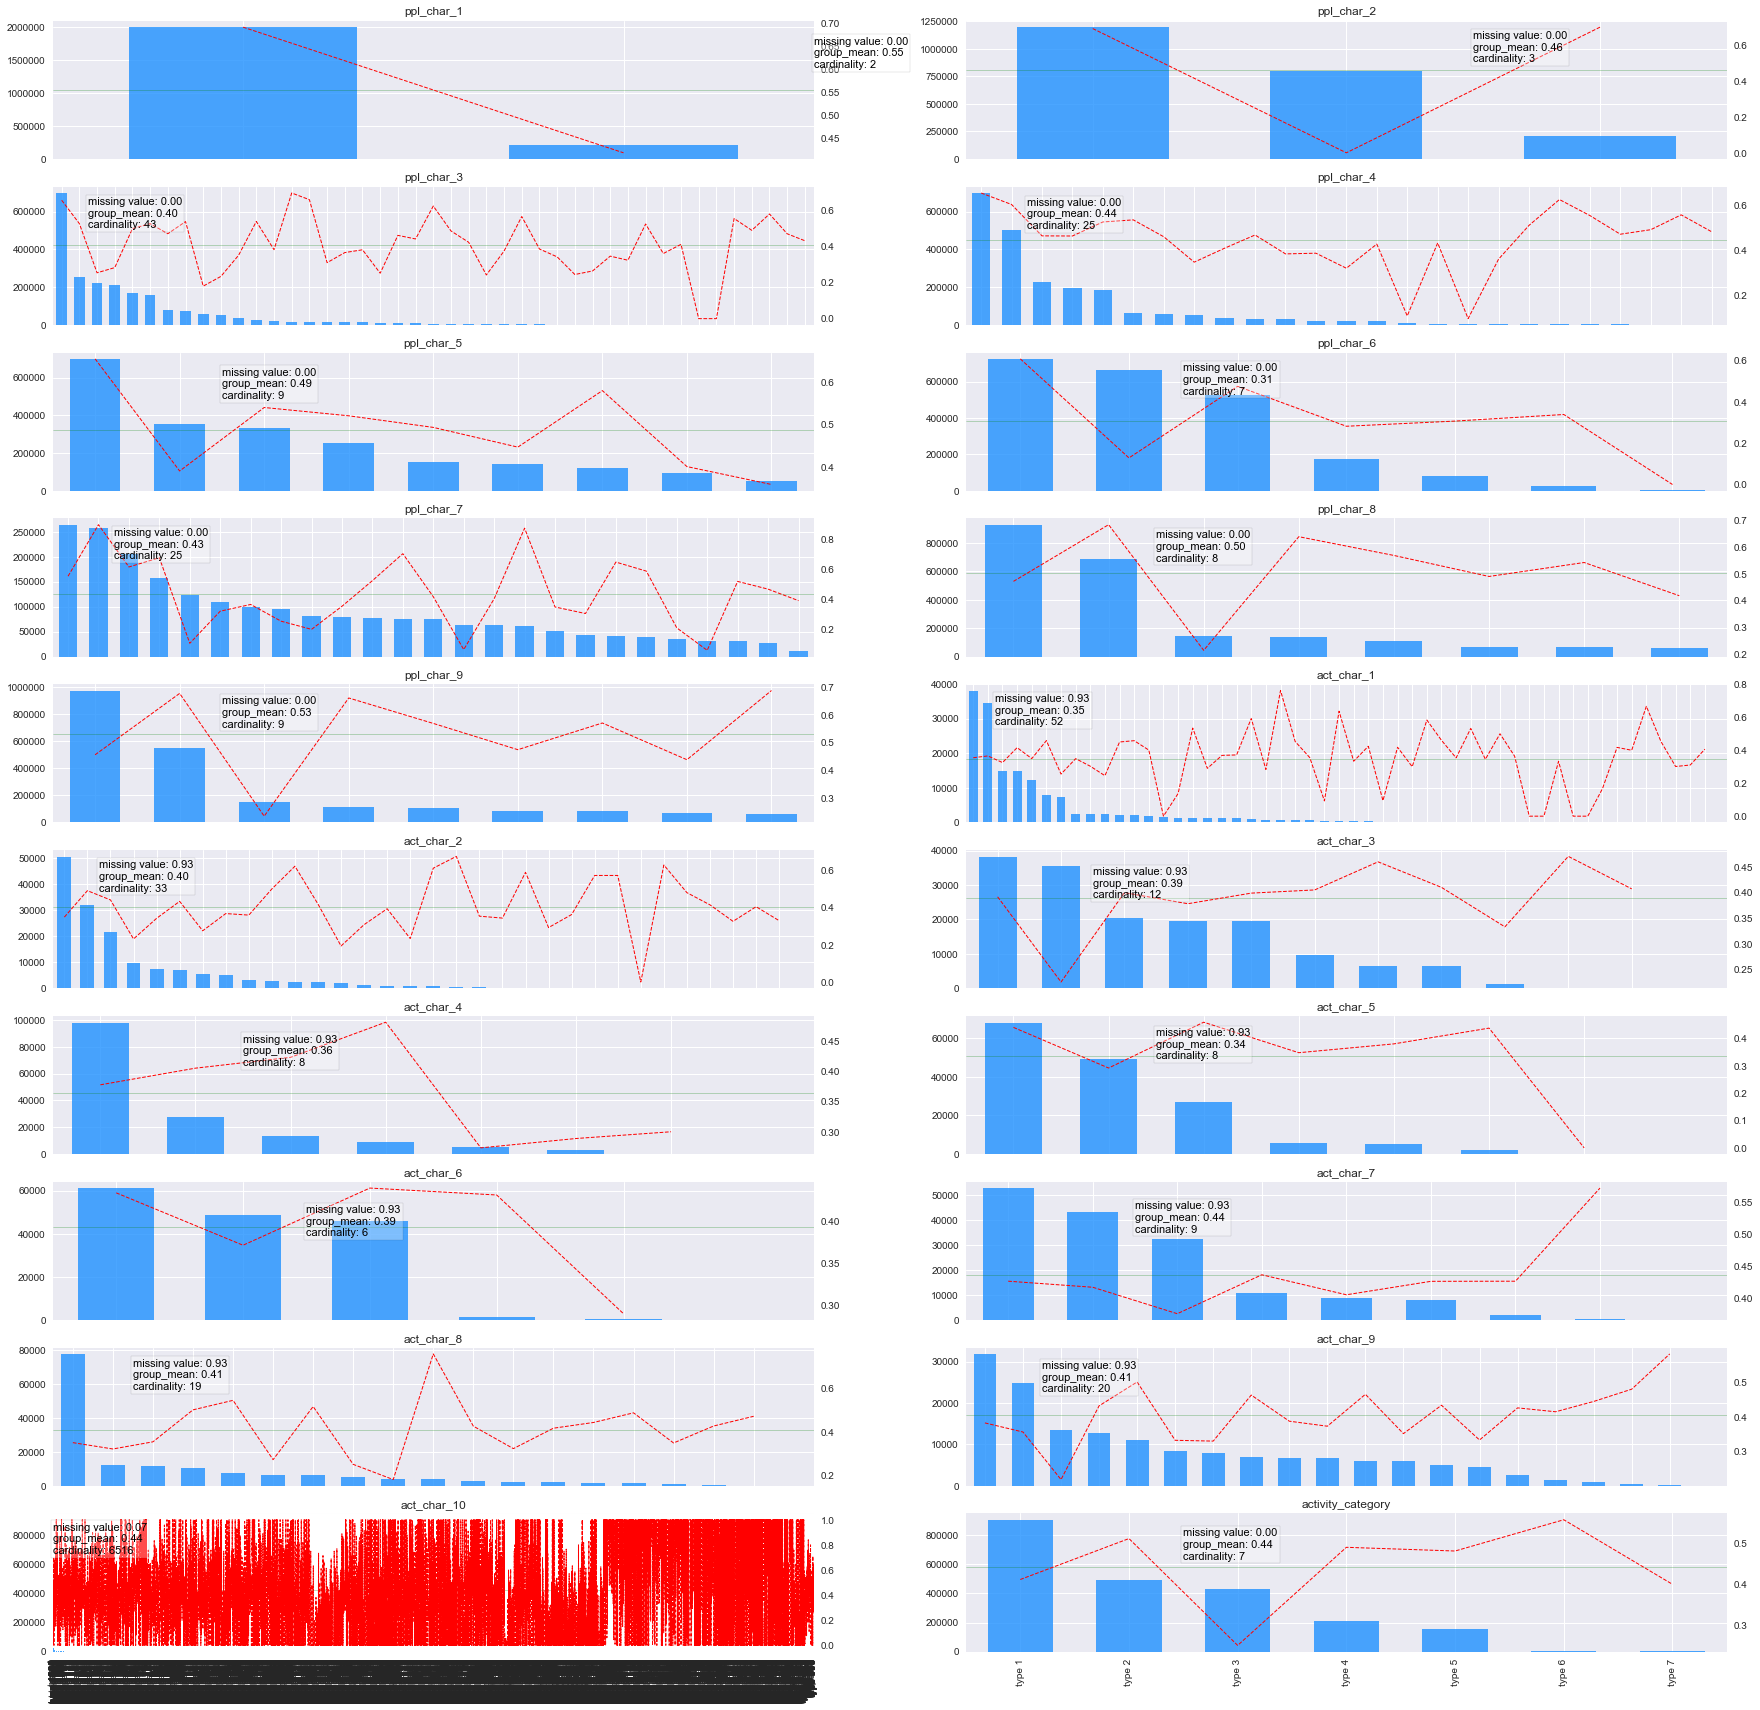

In [95]:
plot_cate = ["ppl_char_"+ str(i) for i in range(1,10)] + ['act_char_'+str(i) for i in range(1,11)] + ["activity_category"]
nrow = len(plot_cate) //2


fig = plt.figure(figsize=(30,30))

for ind, factor in enumerate(plot_cate):
    missing_pc = train_data[factor].isnull().values.ravel().sum() / len(train_data[factor])
    card = len(train_data[factor].unique())
    
    mean_max = train_data.groupby([factor])['outcome'].apply(np.mean).max()
    group_mean = train_data.groupby([factor])['outcome'].mean().mean()
    text = "missing value: %.2f\ngroup_mean: %.2f\ncardinality: %d" % (missing_pc,group_mean,card)

    ax1 = fig.add_subplot(nrow, 2,ind+1)
    ax1 = train_data[factor].value_counts().plot(kind='bar', color='dodgerblue', alpha = 0.8, width=0.6, title = factor)
    
    ax2 = ax1.twinx()
    ax2 = train_data.groupby([factor])['outcome'].apply(np.mean).plot(ax = ax2, color='r', style = "--",linewidth = 1,grid = False)
    ax2.set_xlim((-0.5,card -0.5))
    ax2.axhline(y=group_mean,xmin=0,xmax=3,c="g",linewidth=0.5,zorder=0, alpha=0.5)
    ax2.text(1.5, mean_max-0.02, text, horizontalalignment='left',verticalalignment='top', color='black', fontsize=11,
         bbox={'facecolor':'white', 'alpha':0.3, 'pad':2})

In [20]:
train_data['day_diff'].describe()

count    2.197291e+06
mean     2.593235e+02
std      2.748091e+02
min      0.000000e+00
25%      1.700000e+01
50%      1.710000e+02
75%      4.230000e+02
max      1.197000e+03
Name: day_diff, dtype: float64

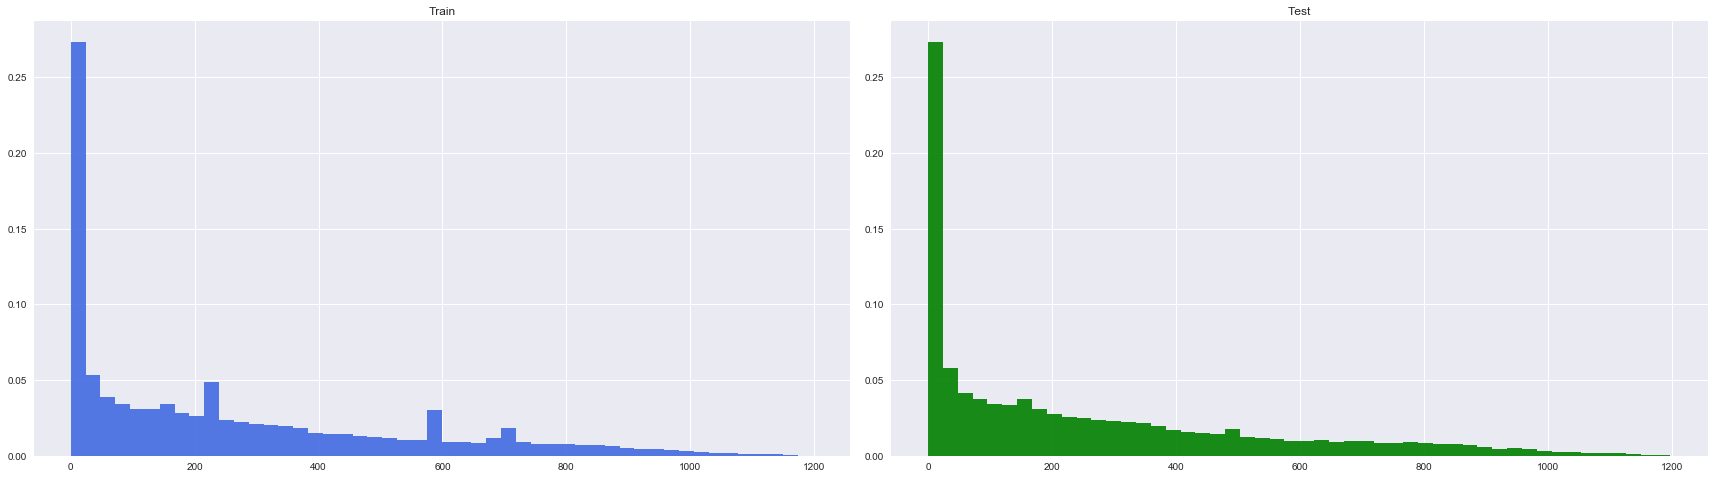

In [35]:
fig = plt.figure(figsize=(30,8))

ax1 = fig.add_subplot(1,2,1)
counts1, bins1 = np.histogram(train_data['day_diff'], bins=50)
binsc1 = bins1[:-1] + np.diff(bins1)/2.
plt.bar(binsc1, counts1/(counts1.sum()*1.0), width=np.diff(bins1)[0], alpha=0.9, color = "royalblue")
plt.title("Train")

ax2 = fig.add_subplot(1,2,2, sharex=ax1, sharey=ax1)
counts2, bins2 = np.histogram(test_data['day_diff'], bins=50)
binsc2 = bins2[:-1] + np.diff(bins2)/2.
plt.bar(binsc2, counts2/(counts2.sum()*1.0), width=np.diff(bins2)[0], alpha=0.9, color = "green")
plt.title("Test")

plt.subplots_adjust(wspace = 0.05, hspace =0)


In [36]:
def plot_distribution(df, var, **kwargs):
    """
    kernel density estimate for plotting the shape of uni-variable
    :param df: input DataFrame
    :param var: x-axis
    :param kwargs: row/col: to plot by row/col group variable; hue: target variable
    :return: plot
    example: plot_distribution( titanic[titanic['Survived'] == 0] , var = 'Age', hue='Sex') 
    """
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    hue = kwargs.get('hue', None)
    title = kwargs.get('title', '')
    xlabel = kwargs.get('xlabel', '')
    ylabel = kwargs.get('ylabel', '')
    facet = sns.FacetGrid(df, hue=hue, aspect=3.5, size=2.5, row=row, col=col)
    facet.map(sns.kdeplot, var, shade=False)
    sns.plt.title(title)
    facet.set_xlabels(xlabel)
    facet.set_ylabels(ylabel)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend(title=hue)


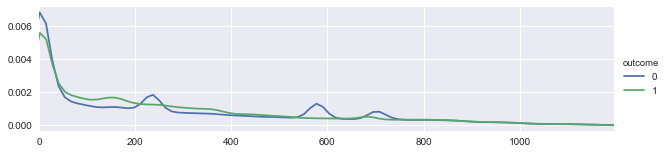

In [37]:
plot_distribution(train_data, var = "day_diff",hue = "outcome")

In [50]:
train_data['month_diff'] = train_data.day_diff// 30

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [56]:
train_data['month_diff'] = train_data['month_diff'].astype("category")

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


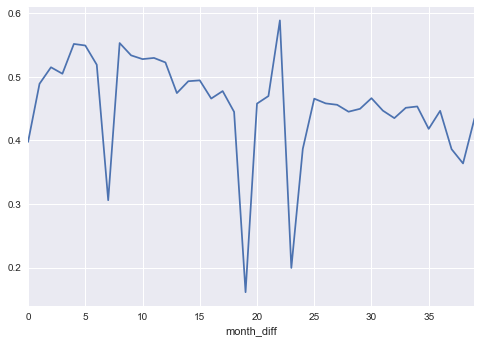

In [59]:
train_data.groupby(['month_diff'])['outcome'].apply(np.mean).plot()

In [62]:
train_data.ix[train_data.day_diff == train_data.day_diff.max(), ['reg_date','act_date']]

,reg_date,act_date
1882386,2020-05-21,2023-08-31
1882387,2020-05-21,2023-08-31
1882388,2020-05-21,2023-08-31


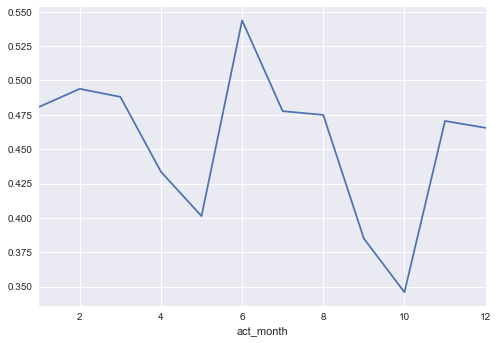

In [63]:
train_data.groupby(['act_month'])['outcome'].apply(np.mean).plot()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


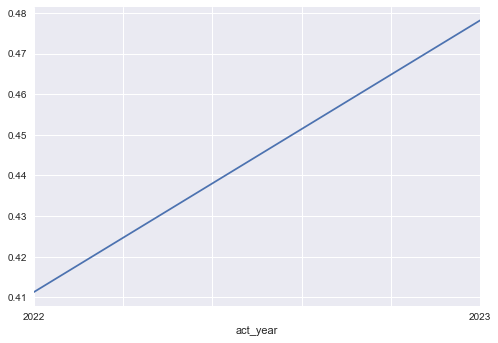

In [66]:
train_data['act_year'] = train_data['act_year'].astype("category")
train_data.groupby(['act_year'])['outcome'].apply(np.mean).plot()

In [105]:
train_data.groupby(['activity_category','act_month'])['outcome'].mean().unstack("activity_category").apply(lambda x: x- x.mean())

activity_category,type 1,type 2,type 3,type 4,type 5,type 6,type 7
act_month,,,,,,,
1,0.002360,0.006968,0.105230,-0.026868,0.001545,-0.046867,-0.067268
2,-0.022282,0.043982,0.117058,0.045251,-0.124808,-0.063687,0.051181
3,-0.039637,0.022404,0.061612,0.076511,-0.217515,-0.015576,-0.072911
4,-0.062081,-0.033757,0.034910,-0.039454,-0.057211,-0.062623,-0.115140
5,-0.027625,-0.069033,-0.015726,-0.089303,-0.327277,-0.058897,0.043919
6,0.004983,0.008671,0.144084,0.046937,0.425784,0.048252,-0.039030
7,-0.029448,-0.013859,0.019749,-0.015163,0.188519,0.031812,-0.165816
8,0.005302,-0.003815,0.023474,-0.006019,0.004372,0.059208,0.040083
9,0.146254,0.013108,-0.255533,0.038907,0.024115,0.013907,0.124564


In [103]:
train_data.groupby(['activity_category','act_month'])['outcome'].size().unstack("activity_category").apply(lambda x: x/ x.sum())

activity_category,type 1,type 2,type 3,type 4,type 5,type 6,type 7
act_month,,,,,,,
1,0.055458,0.091653,0.020545,0.089514,0.079124,0.042558,0.029775
2,0.091140,0.118691,0.043346,0.118237,0.059094,0.090054,0.073171
3,0.111005,0.099751,0.083014,0.097303,0.008009,0.078298,0.072854
4,0.090753,0.060177,0.079638,0.054457,0.002111,0.063485,0.119100
5,0.038689,0.043581,0.060828,0.044914,0.000558,0.039737,0.098194
6,0.065895,0.067468,0.070618,0.116371,0.027354,0.073830,0.068736
7,0.085151,0.092453,0.063916,0.084400,0.036060,0.089819,0.087742
8,0.133350,0.148139,0.068056,0.173586,0.013841,0.298142,0.306303
9,0.089750,0.079025,0.195285,0.048003,0.230937,0.042558,0.019639


In [85]:
test_data['people_id'].isin(train_data['people_id'].tolist()).sum()

0

In [110]:
ppl_char = ["ppl_char_" + str(i) for i in range(10, 38)]
train_data[ppl_char].apply(lambda x: x.sum())

ppl_char_10    530132
ppl_char_11    453790
ppl_char_12    515924
ppl_char_13    767889
ppl_char_14    560601
ppl_char_15    575676
ppl_char_16    589449
ppl_char_17    614616
ppl_char_18    389899
ppl_char_19    595892
ppl_char_20    458717
ppl_char_21    590187
ppl_char_22    591558
ppl_char_23    624393
ppl_char_24    397192
ppl_char_25    698508
ppl_char_26    369661
ppl_char_27    512892
ppl_char_28    597305
ppl_char_29    358480
ppl_char_30    447830
ppl_char_31    589912
ppl_char_32    588877
ppl_char_33    470391
ppl_char_34    759825
ppl_char_35    442383
ppl_char_36    721295
ppl_char_37    595098
dtype: int64

In [113]:
ppl_act = train_data.groupby(['people_id'])['outcome'].agg({'ttl':np.size,'sum':np.sum,'mean': np.mean})

In [132]:
ppl_act['ttl'] = ppl_act['ttl'].astype('float')

In [126]:
ppl_act['tag'] = ppl_act['mean'].values > 0

In [142]:
ppl_act.groupby(['tag'])['ttl'].describe()

tag         
False  count    82524.000000
       mean        12.959333
       std        265.259585
       min          1.000000
       25%          2.000000
       50%          4.000000
       75%         12.000000
       max      55103.000000
True   count    68771.000000
       mean        16.399863
       std        208.483755
       min          1.000000
       25%          2.000000
       50%          5.000000
       75%         17.000000
       max      53668.000000
Name: ttl, dtype: float64